In [75]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import pandas as pd
import numpy as np

In [5]:
point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])


print(polygon.contains(point))

True


In [83]:
df = pd.read_json('bomen.json')
df["buurt_naam"] = np.nan
df["buurt_code"] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122849 entries, 0 to 122848
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   objectid                     122849 non-null  int64  
 1   boomnummer                   122849 non-null  int64  
 2   geovisia_id                  122849 non-null  object 
 3   eigenaar                     119042 non-null  object 
 4   beheerder                    122328 non-null  object 
 5   boomsoort                    108397 non-null  object 
 6   boomsoort_varieteit          119551 non-null  object 
 7   boomsoort_nederlands         98327 non-null   object 
 8   eindbeeld                    107728 non-null  object 
 9   hoogte                       103289 non-null  object 
 10  plantjaar                    119473 non-null  float64
 11  status_ter_indicatie         72848 non-null   object 
 12  boom_def_afwezig             111388 non-null  object 
 13 

In [24]:
df_buurt = pd.read_json('buurten_pd.json')
df_buurt

,type,geometry,properties
0,Feature,"{'coordinates': [[[5.496376105740801, 51.49677...","{'buurtcode': 546, 'buurtnaam': 'Bokt', 'wijkc..."
1,Feature,"{'coordinates': [[[5.447887893715761, 51.46849...","{'buurtcode': 426, 'buurtnaam': 'Vredeoord', '..."
2,Feature,"{'coordinates': [[[5.480378012450603, 51.44638...","{'buurtcode': 115, 'buurtnaam': 'TU-terrein', ..."
3,Feature,"{'coordinates': [[[5.420799748024049, 51.44408...","{'buurtcode': 632, 'buurtnaam': 'Meerbos', 'wi..."
4,Feature,"{'coordinates': [[[5.469716276375012, 51.48407...","{'buurtcode': 532, 'buurtnaam': 'Tempel', 'wij..."
...,...,...,...
111,Feature,"{'coordinates': [[[5.484935423998946, 51.42964...","{'buurtcode': 213, 'buurtnaam': 'Elzent-Noord'..."
112,Feature,"{'coordinates': [[[5.493297807909147, 51.42352...","{'buurtcode': 221, 'buurtnaam': 'Kerstroosplei..."
113,Feature,"{'coordinates': [[[5.505054816273253, 51.42183...","{'buurtcode': 234, 'buurtnaam': 'Tivoli', 'wij..."
114,Feature,"{'coordinates': [[[5.492793179430379, 51.42417...","{'buurtcode': 236, 'buurtnaam': 'Nieuwe Erven'..."


In [59]:
point = Point(df.iloc[0].geo_point_2d['lon'], df.iloc[0].geo_point_2d['lat'])

print(point)

POINT (5.458675408131263 51.41571809950286)


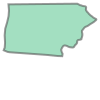

In [60]:
polygon = Polygon(df_buurt.iloc[0]['geometry']['coordinates'][0])
polygon

In [61]:
print(polygon.contains(point))

False


In [84]:
i = 0
while i < 116:   
    polygon = Polygon(df_buurt.iloc[i]['geometry']['coordinates'][0])
#     print(i)
    if(polygon.contains(point)):
        print(df_buurt.iloc[i]['properties']['buurtnaam'])
        print(df_buurt.iloc[i]['properties']['buurtcode'])
        break;    
    i+=1

Bennekel-West, Gagelbosch
725


In [101]:
for index, row in df.iterrows():    
    print(str(index)+"/122849", end='\r')
    
    point = Point(df.iloc[index].geo_point_2d['lon'], df.iloc[index].geo_point_2d['lat'])
    
    i = 0
    while i < 116:   
        polygon = Polygon(df_buurt.iloc[i]['geometry']['coordinates'][0])        
        if(polygon.contains(point)):
#           print(df_buurt.iloc[i]['properties']['buurtnaam'])
#           print(df_buurt.iloc[i]['properties']['buurtcode'])            
            df.at[index, 'buurt_naam'] = df_buurt.iloc[i]['properties']['buurtnaam']
            df.at[index, 'buurt_code'] = df_buurt.iloc[i]['properties']['buurtcode']
            break;    
        i+=1


In [102]:
df

,objectid,boomnummer,geovisia_id,eigenaar,beheerder,boomsoort,boomsoort_varieteit,boomsoort_nederlands,eindbeeld,hoogte,...,epr_risicoprofiel,epr_datum_mech_bestreden,epr_datum_1_bio_bestrijding,epr_datum_2_bio_bestrijding,nazorgboom,projectnaam,geo_shape,geo_point_2d,buurt_naam,buurt_code
0,994100,41507,B11A92DF-8B54-488D-A034-E05D30FB98CB,BOR,BOR Stedelijk,Fraxinus excelsior,Onbekend,Es,"TR3,0 m rondom",12-15,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.458675408131263, 'lat': 51.415718099...","Bennekel-West, Gagelbosch",725.0
1,994103,42320,B014F113-61EB-4D97-88AD-919CA70AA85B,BOR,BOR Natuur,Fraxinus excelsior,Onbekend,Es,"TR4,2 m rondom",12-15,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.503841256519405, 'lat': 51.487108184...",Bokt,546.0
2,994105,42324,B756D8EF-3395-46EA-85FB-F3678CFF8BEF,BOR,BOR Stedelijk,Carpinus betulus,Frans Fontaine,Zuilhaagbeuk,"TR4,2 m rondom",9-12,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.484728633428525, 'lat': 51.470391910...",Vlokhoven,516.0
3,994107,42327,409099E7-33D7-4BA1-A93D-EA92782E4A6E,BOR,BOR Stedelijk,Acer saccharinum,Wieri,Zilveresdoorn cv,"TR4,2 m rondom",15-18,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.463611040485759, 'lat': 51.410824833...",Gennep,726.0
4,994110,47050,48B885DF-5C07-4510-BE5E-CEEDDA958D50,BOR,BOR Stedelijk,Gleditsia triacanthos,Skyline,Valse christusdoorn cv,"TR3,0 m rondom",15-18,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.51294408741034, 'lat': 51.4416591667...",Doornakkers-West,321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122844,1099189,187460,8EC610AF-6206-44FB-853D-F9F53989FC8E,BOR,Overige gemeentelijke dienst,Tilia tomentosa,Doornik,None,"TR4,2 m rondom",None,...,None,None,None,None,True,Stoutheuvel,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.491707171568508, 'lat': 51.477472351...",Vaartbroek,543.0
122845,1099191,187928,A156E43D-AD98-4321-88EB-6E4297F70705,BOR,Overige gemeentelijke dienst,Betula nigra,Onbekend,None,"TR4,2 m rondom",None,...,None,None,None,None,True,"Waterrijk 2,4,9","{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.401588526403022, 'lat': 51.439215633...",Waterrijk,635.0
122846,1099192,187929,4DF21A7A-CEA4-4FAB-BE0D-CAB26B7B75D0,BOR,Overige gemeentelijke dienst,Betula nigra,Onbekend,None,"TR4,2 m rondom",None,...,None,None,None,None,True,"Waterrijk 2,4,9","{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.401667365254594, 'lat': 51.439198095...",Waterrijk,635.0
122847,1099197,187318,DDAF47AB-F5CE-495A-A2DB-2520EF80BB12,BOR,Overige gemeentelijke dienst,Populus berolinensis,Onbekend,None,"TR4,2 m rondom",None,...,None,None,None,None,True,Aanschot,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 5.475384099527435, 'lat': 51.493860477...",Blixembosch-Oost,534.0


In [103]:
df['buurt_naam'].value_counts()

Bennekel-West, Gagelbosch    5931
Tempel                       3376
Blixembosch-Oost             2799
Genderbeemd                  2720
Kerkdorp Acht                2609
                             ... 
Joriskwartier                 211
Elzent-Zuid                   195
Leenderheide                  178
Tivoli                        174
Bloemenplein                  139
Name: buurt_naam, Length: 116, dtype: int64

In [106]:
df.to_json(r'bomen_comb.json', orient='records')


In [78]:
# for index, row in df_buurt.iterrows():
#     print(index)
#     print(row['geometry']['coordinates'][0])